# Dashboard

In [132]:
import panel as pn
import pandas as pd

## Import notebooks

### Data analysis

/var/folders/dh/_ks73kfn57l67vxm7b5y16qw0000gn/T/ipykernel_63534/2418983821.py:9: UserWarning:

Using Panel interactively in VSCode notebooks requires the jupyter_bokeh package to be installed. You can install it with:

   pip install jupyter_bokeh

or:
    conda install jupyter_bokeh

and try again.



/var/folders/dh/_ks73kfn57l67vxm7b5y16qw0000gn/T/ipykernel_63534/906118654.py:8: UserWarning:

Using Panel interactively in VSCode notebooks requires the jupyter_bokeh package to be installed. You can install it with:

   pip install jupyter_bokeh

or:
    conda install jupyter_bokeh

and try again.



interactive(children=(SelectMultiple(description='Barrios', index=(46,), layout=Layout(width='50%'), options=(…

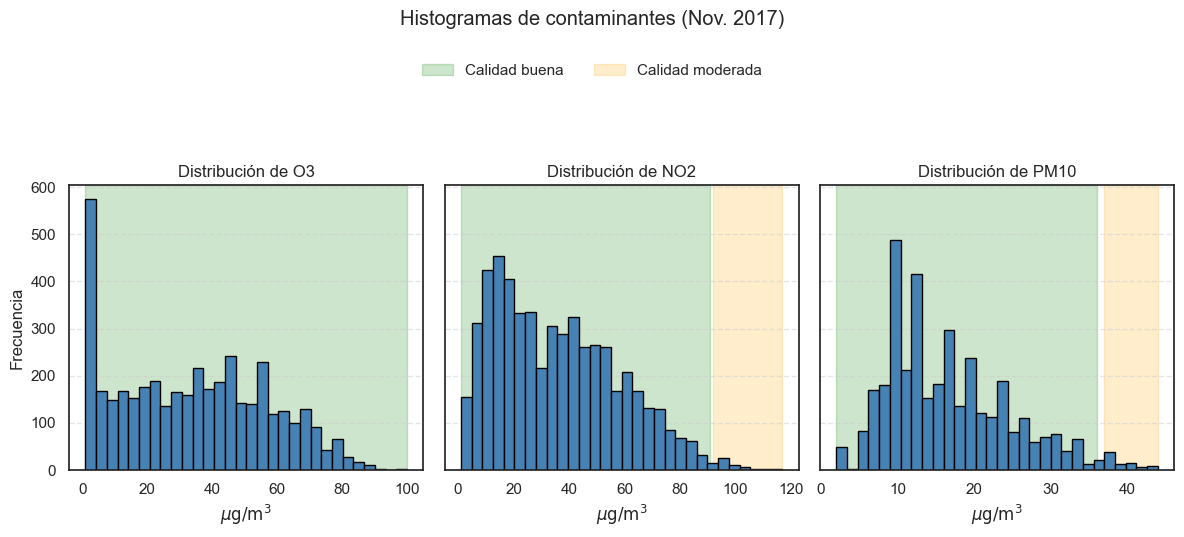

In [133]:
%run graphs.ipynb

### ML model

In [ ]:
%run model_ml.ipynb

## Fondo tabs

In [121]:
# Pane HTML que pinta el fondo de la intro
intro_html = pn.pane.HTML("""
<div style="
    position: fixed;
    width: 100vw;
    height: 100vh;
    background-image: url('images/background.png');
    background-size: cover;
    background-position: center;
    z-index: -1;
">
</div>
""", sizing_mode="stretch_both")

In [122]:
# Logo
logo_tabs = pn.pane.PNG("images/logo.png", width=500)

## Intro 

In [123]:
pn.extension()

# Layout final con todo centrado
intro_tab = pn.Column(
    pn.Spacer(height=20),
    pn.Row(intro_html, align="center"),
    sizing_mode="stretch_width",
    align="center"
)

/var/folders/dh/_ks73kfn57l67vxm7b5y16qw0000gn/T/ipykernel_63534/3708019814.py:1: UserWarning:

Using Panel interactively in VSCode notebooks requires the jupyter_bokeh package to be installed. You can install it with:

   pip install jupyter_bokeh

or:
    conda install jupyter_bokeh

and try again.



## Datos

In [124]:
df = pd.read_csv("data/df_final.csv")
datos_tab = pn.Column(
    pn.Row(logo_tabs),
    "# 🧾 Datos",
    pn.widgets.DataFrame(df, width=1400, height=600),
    sizing_mode="stretch_width"
)

## Análisis de datos

In [125]:
analisis_tab = pn.Column(
    pn.Row(logo_tabs),
    "# 📊 Análisis de datos",
    pn.pane.plot.Folium(m_analisis, width=1200, height=600),
    sizing_mode="stretch_width"
)

## Calidad del aire

In [126]:
aq_tab = pn.Column(
    pn.Row(logo_tabs),
    "# 💨 Calidad del aire",
    pn.pane.Matplotlib(fig_aq_hist, tight=True, width=1200, height=600),
    sizing_mode="stretch_width"
)

## Conexiones entre barrios por líneas de bus

In [127]:
bus_tab = pn.Column(
    pn.Row(logo_tabs),
    "# 🚌 Conexiones entre barrios por líneas de bus",
    crear_tab_conexiones_bus(),
    sizing_mode="stretch_width"
)

## Escenarios de Predicción de Esperanza de Vida

In [128]:
prediccion_esp = pn.Column(
    pn.Row(logo_tabs),
    "# 📈 Escenarios de Predicción de Esperanza de Vida",
    pn.Accordion(
        ("Distribución del cambio en esperanza de vida por escenario", pn.pane.Matplotlib(fig_scenario_boxplot, tight=True, width=1200, height=600)),
        ("Cambio medio en esperanza de vida por escenario", pn.pane.Matplotlib(fig_mean_diff, tight=True, width=1200, height=600)),
        ("Actual vs Proyectado: Esperanza de Vida por Escenario", pn.pane.Matplotlib(fig_actual_vs_projected, tight=True, width=1200, height=600)),
        ("Radar: Media de cambio de esperanza de vida por escenario", pn.pane.Matplotlib(fig_radar_mean, tight=True, width=1200, height=600)),

        ("Heatmap de cambio en esperanza de vida por escenario y barrio", pn.pane.Matplotlib(fig_heatmap, tight=True, width=1200, height=600)),
        ("Clustermap de barrios según escenarios", pn.pane.Matplotlib(fig_clustermap, tight=True, width=1200, height=600))
    ),
    sizing_mode='stretch_width'
)

## Mapa de los escenarios

In [129]:
mapa_esp = pn.Column(
    pn.Row(logo_tabs),
    "# 🗺️ Mapa de los escenarios",
    pn.pane.plot.Folium(m, width=1200, height=600),
    sizing_mode="stretch_width"
)

## Tabs

In [130]:
pn.extension('tabulator')
pn.extension('plotly')
# Tabs
tabs = pn.Tabs(
    ("📘 Introducción", intro_tab),
    ("🧾 Datos", datos_tab),
    ("📊 Análisis de datos", analisis_tab),
    ("💨 Calidad del aire", aq_tab),
    ("🚌 Conexiones entre barrios por líneas de bus", bus_tab),
    ("🗺️ Mapa de los escenarios", mapa_esp),
    ("📈 Escenarios de Predicción de Esperanza de Vida", prediccion_esp),
    sizing_mode='stretch_both',
    width_policy='max',
    height_policy='max'
)

/var/folders/dh/_ks73kfn57l67vxm7b5y16qw0000gn/T/ipykernel_63534/1769009015.py:1: UserWarning:

Using Panel interactively in VSCode notebooks requires the jupyter_bokeh package to be installed. You can install it with:

   pip install jupyter_bokeh

or:
    conda install jupyter_bokeh

and try again.



/var/folders/dh/_ks73kfn57l67vxm7b5y16qw0000gn/T/ipykernel_63534/1769009015.py:2: UserWarning:

Using Panel interactively in VSCode notebooks requires the jupyter_bokeh package to be installed. You can install it with:

   pip install jupyter_bokeh

or:
    conda install jupyter_bokeh

and try again.



## App

In [ ]:
dashboard = pn.Column(tabs)
dashboard.save("dashboard_bcn.html", embed=True)